## ME228 - Hackathon              22b2429

### Part a.<br>
In this question, we want to obtain the governing ordinary differential equation for the evolution of population of two creatures.<br> Let their populations be x1 and x2 , then what we desire to find is the following:<br>
dx1/dt = f(x1, x2, x1^2, x2^2, $x1*x2$) and<br>
dx2/dt = g(x1, x2, x1^2, x2^2, $x1*x2$)<br>
What we are given is the values of x1 and x2, ie the respective population of leoplanet and paldore at time intervals of 0.1.<br> 
The scatter plots of their respective population are generated using the below block of code:

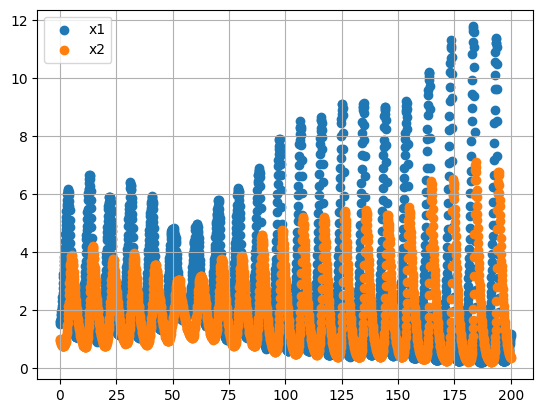

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

pop = pd.read_csv("29.csv")

# TODO
time=pop.iloc[:,0]*0
for i in range(len(time)):
    time[i]=i*0.1
plt.scatter(time,pop.iloc[:,0])
plt.scatter(time,pop.iloc[:,1])
plt.legend(["x1","x2"])
plt.grid(True)
plt.show()

### Part b : <br>
Now, We will be using Multiple Linear Regression to find the governing ODE in both the cases.<br>
So basically, our Hypothesis Set will be as follows :<br>
dx1/dt = $a*x1 + b*x2+ c*x1^2 + d*x2^2 + e*x1*x2 + f$  where (a,b,c,d,e,f) belong to Real No<br>
and<br>
dx2/dt = $u*x1 +v*x2+ w*x1^2 + x*x2^2 + y*x1*x2 + z $, where (u,v,w,x,y,z) belong to Real No <br> 
So, basically what we will do intially is add new columns to our dataframe including those of the<br>
derivatives and the non linear terms.<br>
Then We will split the data into train and test data sets (thrice using forward chaining as explained in the next blck in detail).<br>
After this, in each of the train data, We will train my MLR model, once for x1_derivative and secondly for x2_derivative and carry out Feature Redn using p values.( p value elimination explained in next blck in detail)<br>
Now , We will asscess the performance of my model on the testing data by checking the Mse and also the curves of predicted vs actual values. <br> 
We will then obtain the governing ODEs for both creatures using the co-efficients given by our model.


### Part c. Pseudo Code: <br>
1.Import csv file <br>
2.plot the daa to check for any noise( minimal in this check by manual inspection)<br>
3.now add new columns to this datset which contains the derivatives of x1 and x2 wrt time using central difference method<br>
And also add the non linear terms upto the second degree.<br>
4.Now split the data into train and test sets thrice using forward chaining.<br>
Forward chaining while splitting basically makes sure of the fact  That more accurately models the situation you’ll<br>
see at prediction time, where you’ll model on past data and predict on forward-looking data. It also will give you <br>
a sense of the dependence of your modeling on data size.<br>
Hence , These are 3 splits : <br>
First 40 perecnt train ,40-60 percent test<br>
Then  First 60 percent train ,60-80 percent test<br>
Then  First 80 percent train ,80-100 percent test<br>
5.Now in each of these splits, use the train data to model the ODE Using MLR  <br>
applied twice, once to fit dx1/dt and then to fit dx2/dt.<br>
6.Now look at the p values of your co-efficients as given by the model, and eliminate those features one by one whose<br>
p values is more than 0.05 as they have almost no relationship with the output label.<br>
7.Now looking at the R_2 , gauge the performance of your model in sample.<br>
8.Using this model get the prediced label on the test data<br>
and gauge your model performance out of sample by lokking at the curves of y_predicted vs y_actual <br>
wrt each of the features and aso observe the MSE values.<br>
9.Now repeat this thrice for each of the splits.<br>

The code which starts from here basically does the work starting from Step 3 to step 9 as mentioned above.

In [5]:
t = 0.1

#  TODO - Calculate derivatives for x1 and x2 (excluding first and last rows)
x1_derivative=time*0
x2_derivative=time*0
for i in range(1,len(time)-1):
    x1_derivative[i]=(pop.iloc[i+1,0]-pop.iloc[i-1,0])/(2*t)
    x2_derivative[i]=(pop.iloc[i+1,1]-pop.iloc[i-1,1])/(2*t)
x1_derivative[0]=None
x1_derivative[-1]=None
x2_derivative[0]=None
x2_derivative[-1]=None

pop['x1_derivative']=x1_derivative
pop['x2_derivative']=x2_derivative
pop["time"]=time

pop['x1_squared'] = pop['x1'] ** 2
pop['x2_squared'] = pop['x2'] ** 2
pop['x1_times_x2'] = pop['x1'] * pop['x2']

pop.to_csv("29.csv", index=False)

print(pop.head())

         x1        x2  x1_derivative  x2_derivative  x1_squared  x2_squared  \
0  1.505066  1.001880            NaN            NaN    2.265225    1.003764   
1  1.569910  0.948006       0.524076      -0.373664    2.464616    0.898716   
2  1.609882  0.927147       0.522625      -0.201146    2.591719    0.859602   
3  1.674435  0.907777       0.605508      -0.244769    2.803732    0.824060   
4  1.730983  0.878194       0.677403      -0.190437    2.996303    0.771224   

   x1_times_x2  time  
0     1.507897   0.0  
1     1.488284   0.1  
2     1.492598   0.2  
3     1.520014   0.3  
4     1.520139   0.4  


The following two blocks of code are for the first Split as illustrated in the pseudo code abive.
Written soln of part d is at the end, once all the splits are completed.

## Part d and e.

### Split 1 : $dx1/dt $ (Leopanet) :

Coefficients:
const          0.154407
x1             0.694594
x2_squared    -0.032407
x1_times_x2   -0.362529
dtype: float64

P-values:
const           1.311694e-05
x1             7.121600e-198
x2_squared      6.647880e-08
x1_times_x2    2.963519e-217
dtype: float64

R-squared:
0.944735859065732
MSE on training data: 0.09023032792301694 
MSE on test data: 0.13427730749346684


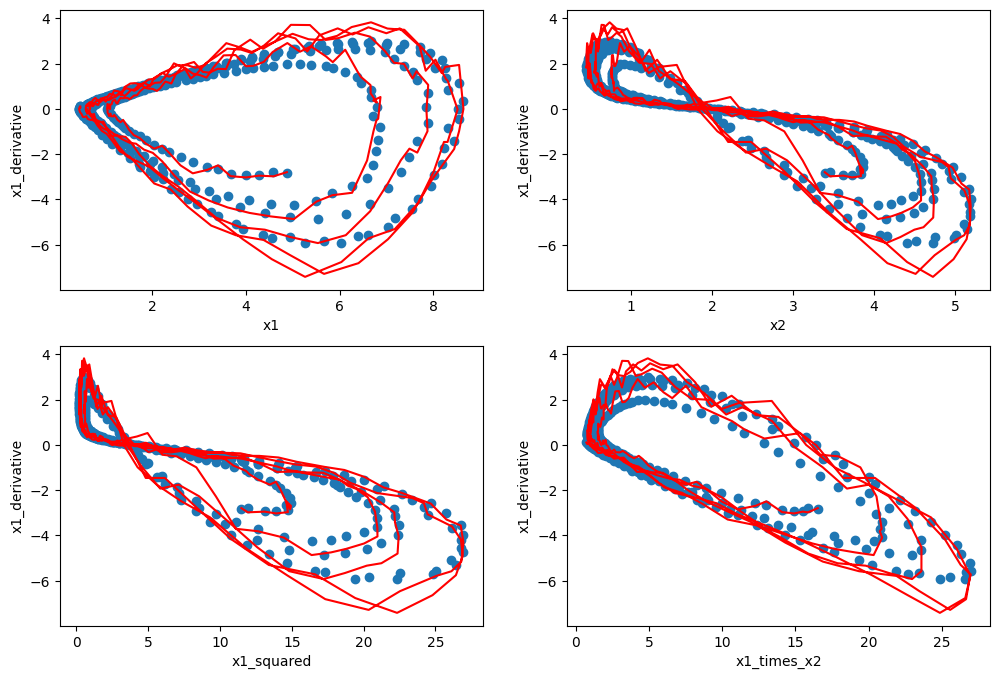

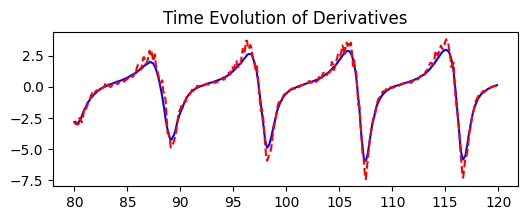

In [78]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.4)
validation_end_index = int(total_rows * 0.6)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# TODO START
X=train_data[['x1','x2_squared','x1_times_x2']]
X=sm.add_constant(X)
y=train_data['x1_derivative']
mlr_question = sm.OLS(y,X).fit()
coefficients=mlr_question.params
p_values=mlr_question.pvalues
R_squared=mlr_question.rsquared
# Define features (X) and target variable (y) and Apply MLR


# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)


# Predicted values using coefficients
X_test=validation_data[['x1','x2_squared','x1_times_x2']]
X_test=sm.add_constant(X_test)
y_predict=mlr_question.predict(X_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x1_derivative (actual vs predicted)
axes[0, 0].scatter(X_test['x1'],y_predict)
axes[0, 0].plot(X_test['x1'],validation_data['x1_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x1_derivative")

# Plot for x2 vs x1_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x1_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x1_derivative")
# Plot for x1_squared vs x1_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x2_squared'],y_predict)
axes[1, 0].plot(validation_data['x2_squared'],validation_data['x1_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x1_derivative")

# Plot for x1_times_x2 vs x1_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'],y_predict)
axes[1, 1].plot(validation_data['x1_times_x2'],validation_data['x1_derivative'],color='red')
axes[1, 1].set_xlabel("x1_times_x2")
axes[1,1].set_ylabel("x1_derivative")

plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x1_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show
# Calculate Mean Squared Error in test data 
mse_train_data=np.mean(np.square(mlr_question.predict(X)-y))
mse_test_data=np.mean(np.square(y_predict-validation_data["x1_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')

# TODO END

### Split 1 : $dx2/dt $ (Paldore) :

Coefficients:
x1            -0.072969
x2            -0.530346
x1_squared     0.013153
x2_squared    -0.019952
x1_times_x2    0.213282
dtype: float64

P-values:
x1              4.214461e-09
x2             8.627520e-120
x1_squared      1.217409e-08
x2_squared      7.517349e-04
x1_times_x2    8.973614e-224
dtype: float64

R-squared:
0.9495674994107779
MSE on training data: 0.029259883908534838 
MSE on test data: 0.03192078312604843


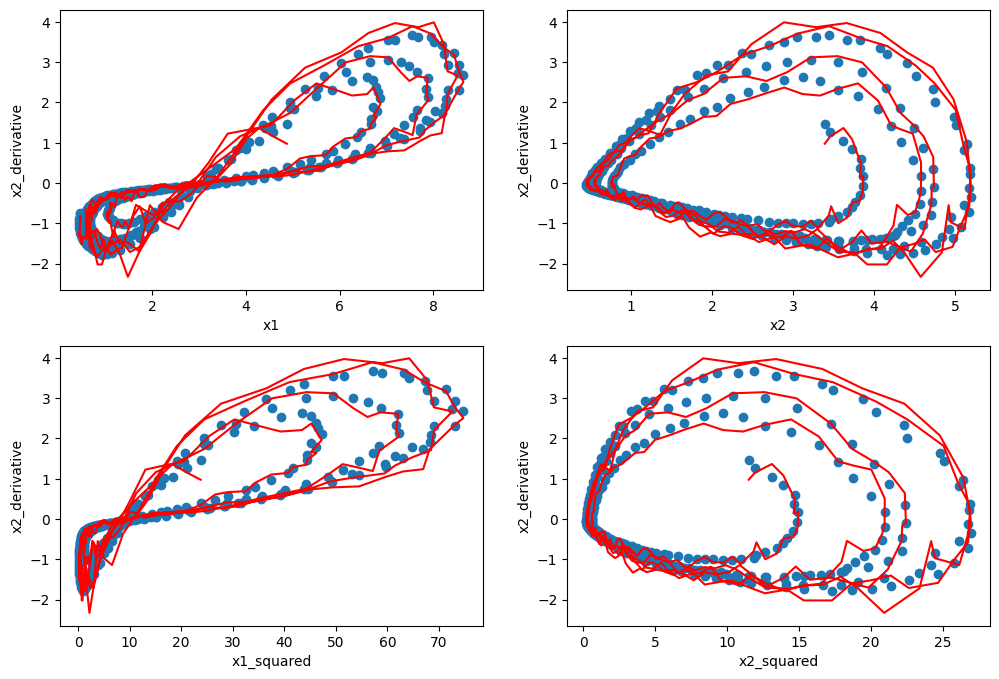

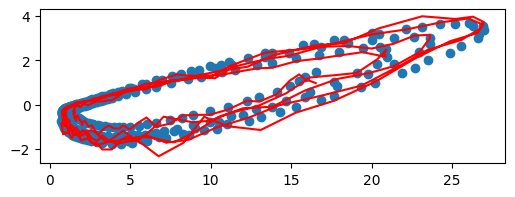

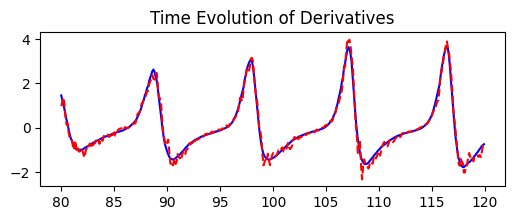

In [81]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.4)
validation_end_index = int(total_rows * 0.6)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]


# TODO START

# Define features (X) and target variable (y) and Apply MLR

X2=train_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]

y2=train_data['x2_derivative']
mlr_question2 = sm.OLS(y2,X2).fit()
coefficients=mlr_question2.params
p_values=mlr_question2.pvalues
R_squared=mlr_question2.rsquared
# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients

X2_test=validation_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]
y2_predict=mlr_question2.predict(X2_test)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x2_derivative (actual vs predicted)
axes[0, 0].scatter(X2_test['x1'],y2_predict)
axes[0, 0].plot(X2_test['x1'],validation_data['x2_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x2_derivative")


# Plot for x2 vs x2_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y2_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x2_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x2_derivative")

# Plot for x1_squared vs x2_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'],y2_predict)
axes[1, 0].plot(validation_data['x1_squared'],validation_data['x2_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x2_derivative")

# Plot for x1_times_x2 vs x2_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x2_squared'],y2_predict)

axes[1, 1].plot(validation_data['x2_squared'],validation_data['x2_derivative'],color='red')
axes[1, 1].set_xlabel("x2_squared")
axes[1,1].set_ylabel("x2_derivative")
plt.figure(figsize=(6,2))
plt.plot(validation_data['x1_times_x2'],validation_data['x2_derivative'],color='red')
plt.scatter(validation_data['x1_times_x2'],y2_predict)
plt.show

plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y2_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x2_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show


# Calculate Mean Squared Error in test data 
mse_train_data=np.mean(np.square(mlr_question2.predict(X2)-y2))
mse_test_data=np.mean(np.square(y2_predict-validation_data["x2_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')
# TODO END

### Split 2 : $dx1/dt $ (Leopanet) :

Coefficients:
const          0.080188
x1             0.778784
x2_squared    -0.020408
x1_times_x2   -0.400589
dtype: float64

P-values:
const          5.216736e-04
x1             0.000000e+00
x2_squared     1.414843e-10
x1_times_x2    0.000000e+00
dtype: float64

R-squared:
0.9645205882632502
MSE on training data: 0.09555624562757521 
MSE on test data: 0.11085823162034796


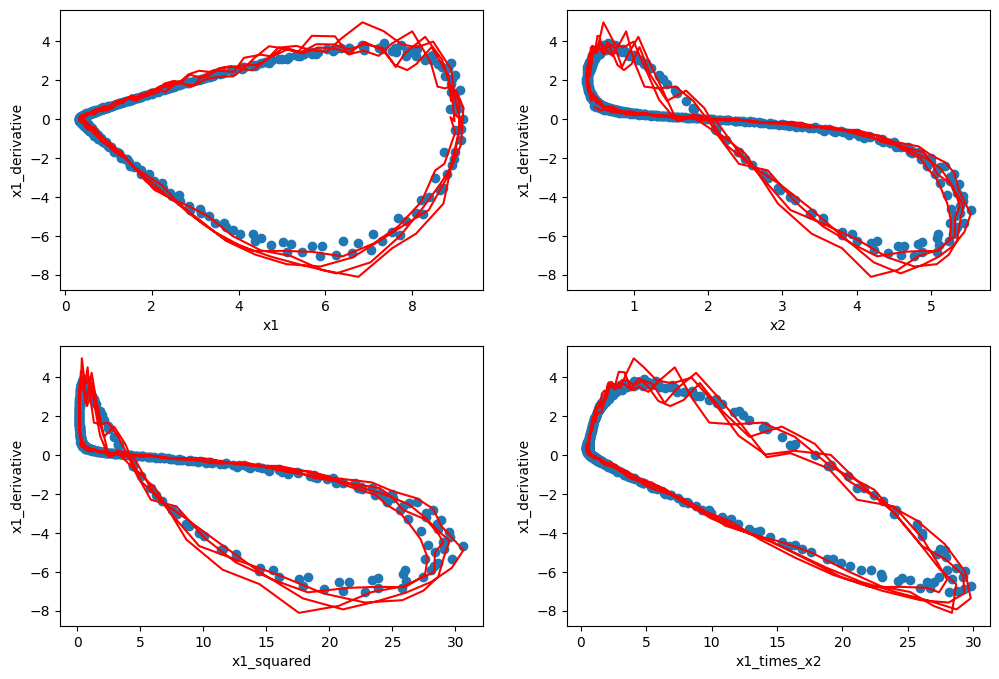

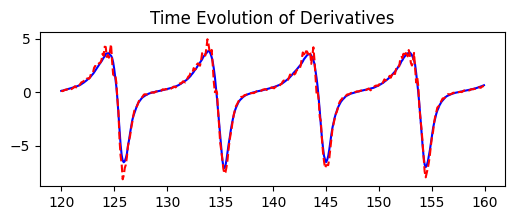

In [82]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.6)
validation_end_index = int(total_rows * 0.8)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# TODO START

# Define features (X) and target variable (y) and Apply MLR
X=train_data[['x1','x2_squared','x1_times_x2']]
X=sm.add_constant(X)
y=train_data['x1_derivative']
mlr_question = sm.OLS(y,X).fit()
coefficients=mlr_question.params
p_values=mlr_question.pvalues
R_squared=mlr_question.rsquared

# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)


# Predicted values using coefficients
X_test=validation_data[['x1','x2_squared','x1_times_x2']]
X_test=sm.add_constant(X_test)
y_predict=mlr_question.predict(X_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x1_derivative (actual vs predicted)
axes[0, 0].scatter(X_test['x1'],y_predict)
axes[0, 0].plot(X_test['x1'],validation_data['x1_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x1_derivative")

# Plot for x2 vs x1_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x1_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x1_derivative")
# Plot for x1_squared vs x1_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x2_squared'],y_predict)
axes[1, 0].plot(validation_data['x2_squared'],validation_data['x1_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x1_derivative")

# Plot for x1_times_x2 vs x1_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'],y_predict)
axes[1, 1].plot(validation_data['x1_times_x2'],validation_data['x1_derivative'],color='red')
axes[1, 1].set_xlabel("x1_times_x2")
axes[1,1].set_ylabel("x1_derivative")

plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x1_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show
# Calculate Mean Squared Error in test data (actual vs predicted)
mse_train_data=np.mean(np.square(mlr_question.predict(X)-y))
mse_test_data=np.mean(np.square(y_predict-validation_data["x1_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')
# TODO END

### Split 2 : $dx2/dt $ (Paldore) :

Coefficients:
x1            -0.045970
x2            -0.584269
x1_squared     0.006769
x2_squared    -0.013372
x1_times_x2    0.224387
dtype: float64

P-values:
x1              2.292865e-10
x2             2.033554e-315
x1_squared      1.852780e-09
x2_squared      8.224367e-06
x1_times_x2     0.000000e+00
dtype: float64

R-squared:
0.9685484261745824


<function matplotlib.pyplot.show(close=None, block=None)>

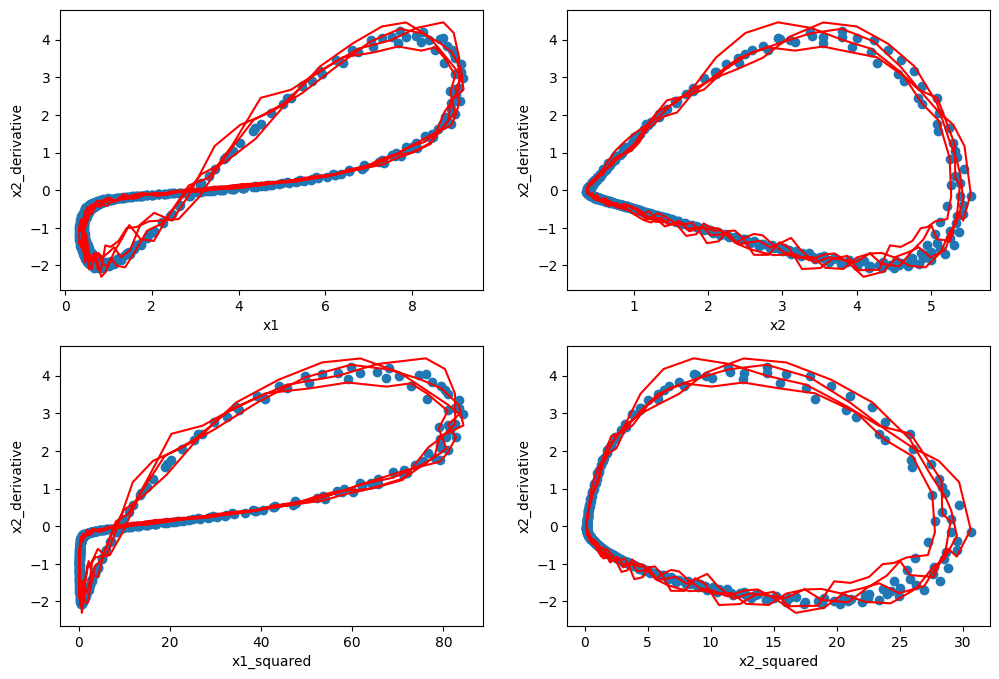

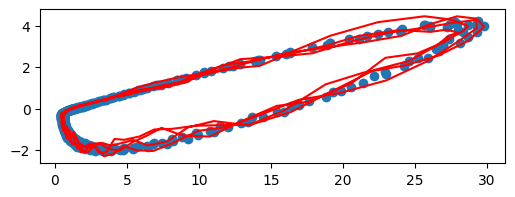

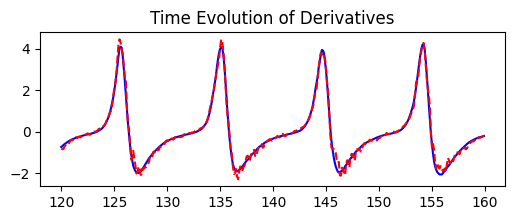

In [63]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.6)
validation_end_index = int(total_rows * 0.8)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# TODO START
X2=train_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]

y2=train_data['x2_derivative']
mlr_question2 = sm.OLS(y2,X2).fit()
coefficients=mlr_question2.params
p_values=mlr_question2.pvalues
R_squared=mlr_question2.rsquared
# Define features (X) and target variable (y) and Apply MLR


# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)


# Predicted values using coefficients
X2_test=validation_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]
y2_predict=mlr_question2.predict(X2_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x1_derivative (actual vs predicted)
axes[0, 0].scatter(X2_test['x1'],y2_predict)
axes[0, 0].plot(X2_test['x1'],validation_data['x2_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x2_derivative")


# Plot for x2 vs x1_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y2_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x2_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x2_derivative")
# Plot for x1_squared vs x1_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'],y2_predict)
axes[1, 0].plot(validation_data['x1_squared'],validation_data['x2_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x2_derivative")

# Plot for x1_times_x2 vs x1_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x2_squared'],y2_predict)

axes[1, 1].plot(validation_data['x2_squared'],validation_data['x2_derivative'],color='red')
axes[1, 1].set_xlabel("x2_squared")
axes[1,1].set_ylabel("x2_derivative")
plt.figure(figsize=(6,2))
plt.plot(validation_data['x1_times_x2'],validation_data['x2_derivative'],color='red')
plt.scatter(validation_data['x1_times_x2'],y2_predict)
plt.show


# Pot time evolution of x2_derivative (actual vs predicted)
plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y2_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x2_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show
# Calculate Mean Squared Error in test data (actual vs predicted)
mse_train_data=np.mean(np.square(mlr_question2.predict(X2)-y2))
mse_test_data=np.mean(np.square(y2_predict-validation_data["x2_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')
# TODO END

### Split 3 : $dx1/dt $ (Leopanet) :

Coefficients:
const         -0.122786
x1             0.841467
x2             0.167323
x1_squared    -0.003680
x2_squared    -0.045403
x1_times_x2   -0.423117
dtype: float64

P-values:
const          1.907773e-03
x1             0.000000e+00
x2             6.021590e-10
x1_squared     2.409506e-02
x2_squared     4.698769e-20
x1_times_x2    0.000000e+00
dtype: float64

R-squared:
0.9745659085655128
MSE on training data: 0.09397176821585795 
MSE on test data: 0.15637060017347115


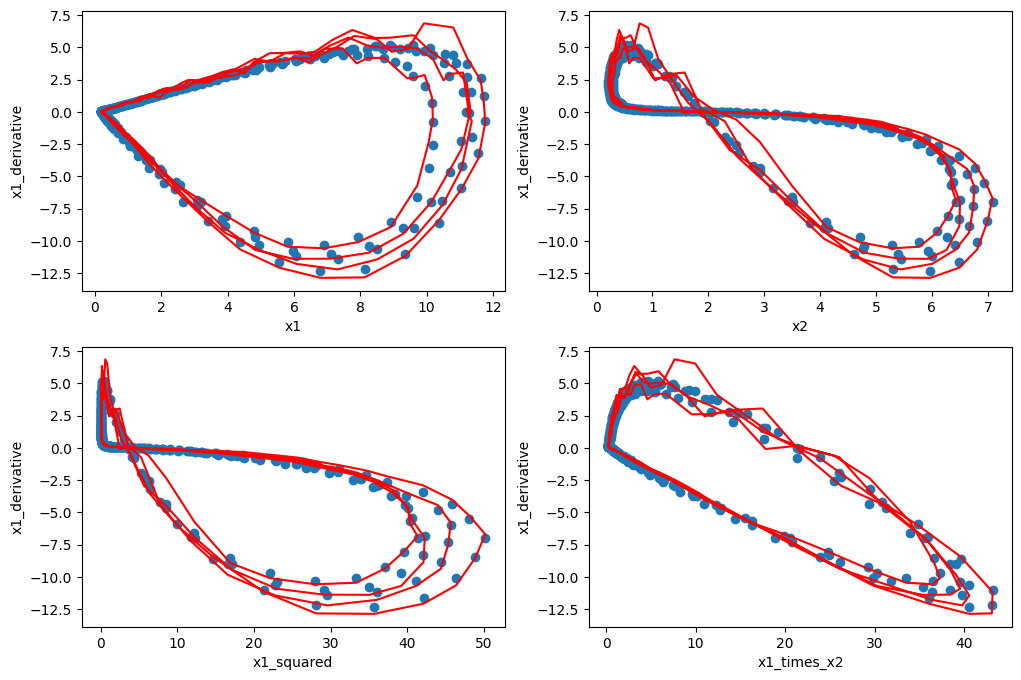

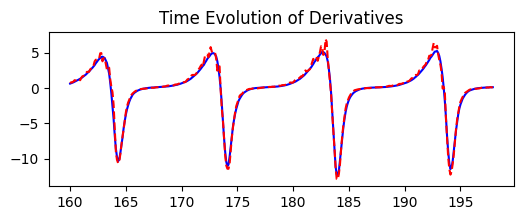

In [83]:
# TODO START
total_rows = len(pop)
train_end_index = int(total_rows * 0.8)
validation_end_index = int(total_rows * 0.99)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# Define features (X) and target variable (y) and Apply MLR

X=train_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]
X=sm.add_constant(X)
y=train_data['x1_derivative']
mlr_question = sm.OLS(y,X).fit()
coefficients=mlr_question.params
p_values=mlr_question.pvalues
R_squared=mlr_question.rsquared
# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)


# Predicted values using coefficients
X_test=validation_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]
X_test=sm.add_constant(X_test)
y_predict=mlr_question.predict(X_test)


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x1_derivative (actual vs predicted)
axes[0, 0].scatter(X_test['x1'],y_predict)
axes[0, 0].plot(X_test['x1'],validation_data['x1_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x1_derivative")

# Plot for x2 vs x1_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x1_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x1_derivative")
# Plot for x1_squared vs x1_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x2_squared'],y_predict)
axes[1, 0].plot(validation_data['x2_squared'],validation_data['x1_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x1_derivative")

# Plot for x1_times_x2 vs x1_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'],y_predict)
axes[1, 1].plot(validation_data['x1_times_x2'],validation_data['x1_derivative'],color='red')
axes[1, 1].set_xlabel("x1_times_x2")
axes[1,1].set_ylabel("x1_derivative")

# Plot time evolution of x1_derivative (actual vs predicted)
plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x1_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show

# Calculate Mean Squared Error in test data 
mse_train_data=np.mean(np.square(mlr_question.predict(X)-y))
mse_test_data=np.mean(np.square(y_predict-validation_data["x1_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')
# TODO END

### Split 3 : $dx2/dt $ (Paldore) :

Coefficients:
x1            -0.035802
x2            -0.613880
x1_squared     0.006165
x2_squared    -0.003846
x1_times_x2    0.222114
dtype: float64

P-values:
x1             4.271936e-12
x2             0.000000e+00
x1_squared     4.072591e-17
x2_squared     5.459546e-02
x1_times_x2    0.000000e+00
dtype: float64

R-squared:
0.9770699268924636


<function matplotlib.pyplot.show(close=None, block=None)>

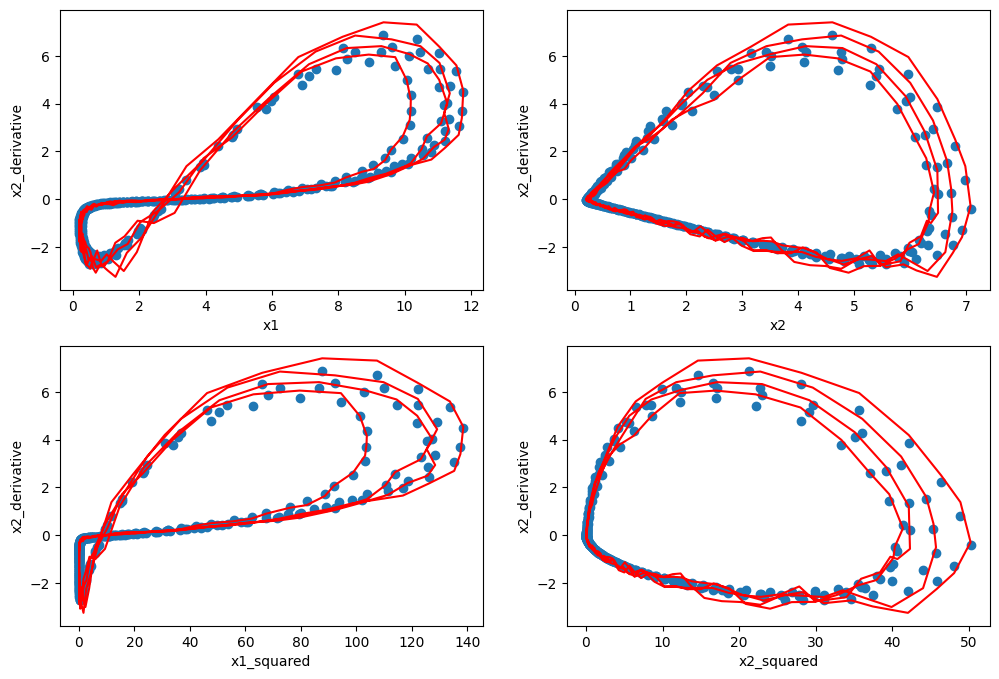

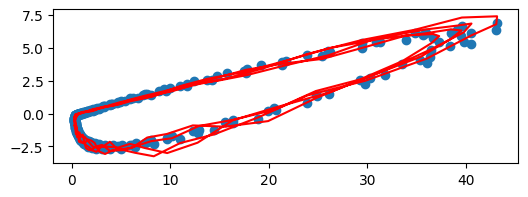

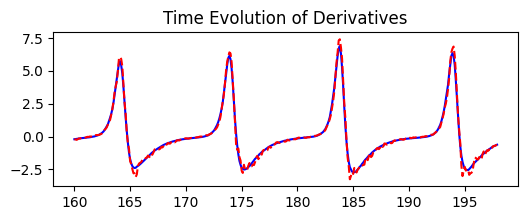

In [70]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.8)
validation_end_index = int(total_rows * 0.99)

train_data = pop[1:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# TODO START

# Define features (X) and target variable (y) and Apply MLR
X2=train_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]

y2=train_data['x2_derivative']
mlr_question2 = sm.OLS(y2,X2).fit()
coefficients=mlr_question2.params
p_values=mlr_question2.pvalues
R_squared=mlr_question2.rsquared

# Get coefficients, p-values, and R-squared


print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(p_values)
print("\nR-squared:")
print(R_squared)


# Predicted values using coefficients
X2_test=validation_data[['x1','x2','x1_squared','x2_squared','x1_times_x2']]
y2_predict=mlr_question2.predict(X2_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for x1 vs x1_derivative (actual vs predicted)
axes[0, 0].scatter(X2_test['x1'],y2_predict)
axes[0, 0].plot(X2_test['x1'],validation_data['x2_derivative'],color='red')
axes[0, 0].set_xlabel("x1")
axes[0,0].set_ylabel("x2_derivative")

# Plot for x2 vs x1_derivative (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'],y2_predict)
axes[0, 1].plot(validation_data['x2'],validation_data['x2_derivative'],color='red')
axes[0, 1].set_xlabel("x2")
axes[0,1].set_ylabel("x2_derivative")
# Plot for x1_squared vs x1_derivative (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'],y2_predict)
axes[1, 0].plot(validation_data['x1_squared'],validation_data['x2_derivative'],color='red')
axes[1, 0].set_xlabel("x1_squared")
axes[1,0].set_ylabel("x2_derivative")

# Plot for x1_times_x2 vs x1_derivative (actual vs predicted)
axes[1, 1].scatter(validation_data['x2_squared'],y2_predict)

axes[1, 1].plot(validation_data['x2_squared'],validation_data['x2_derivative'],color='red')
axes[1, 1].set_xlabel("x2_squared")
axes[1,1].set_ylabel("x2_derivative")
plt.figure(figsize=(6,2))
plt.plot(validation_data['x1_times_x2'],validation_data['x2_derivative'],color='red')
plt.scatter(validation_data['x1_times_x2'],y2_predict)
plt.show
# Plot the time evolution of x2_derivative (actual vs predicted)
plt.figure(figsize=(6,2))
plt.plot(validation_data['time'],y2_predict,color='blue')
plt.plot(validation_data['time'],validation_data['x2_derivative'],linestyle='--',color='red')
plt.title("Time Evolution of Derivatives")
plt.show
# Calculate Mean Squared Error in test data (actual vs predicted)
mse_train_data=np.mean(np.square(mlr_question2.predict(X2)-y2))
mse_test_data=np.mean(np.square(y2_predict-validation_data["x2_derivative"]))
print(f'MSE on training data: {mse_train_data} ')
print(f'MSE on test data: {mse_test_data}')
# TODO END

## Part d : ( Written Note) 
The following are my final hypothesis for the rate of change of two creature populations as given by my model:
<br>
TODO
First I calculated the coefficients of each of the terms(x1,x2,x1^2,x2^2,x1*x2) and after analysis using mlr
came to the conclusion-
(1)while taking splits 1 and split2- i)for dx1/xt , the coefficients of x2 and x1^2 were very small(p values>0.05)
                                    ii)for dx2/dt, the constant term was very small
(2)And for split 3 , only constant term for dx2/dt was significantly small

Now we can neglect those terms which have very small co-efficient as they won't impact the output much<br>
Hence, refined hypothesis:<br>
TODO
we found out in detail about how the derivatives change with time, for both it is a fairly periodic function,
and we can see the start and the ending time for these species

### Part e : (Written Note) <br>
TODO

## Thank You !!